In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation,Layer,Lambda
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import tensorflow  as tf

In [ ]:
Data = pd.read_csv("forestfires.csv")
Data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
Data.drop(["month","day"], axis = 1, inplace = True)
Data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
Data.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [ ]:
Data.loc[Data["size_category"]=='small','size_category']=0
Data.loc[Data["size_category"]=='large','size_category']=1

In [ ]:
Data["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

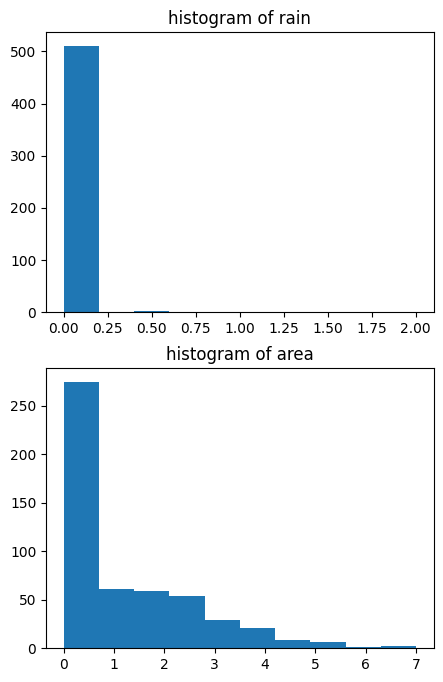

In [ ]:
Data.loc[:, ['rain', 'area']] = Data.loc[:, ['rain', 'area']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(Data['rain'])
ax[0].title.set_text('histogram of rain')
ax[1].hist(Data['area'])
ax[1].title.set_text('histogram of area')

In [ ]:
X = Data.iloc[:,0:28]
Y = Data.iloc[:,28]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train=tf.convert_to_tensor(X_train, dtype=tf.float32)
Y_train=tf.convert_to_tensor(Y_train, dtype=tf.float32)
X_test=tf.convert_to_tensor(X_test, dtype=tf.float32)
Y_test=tf.convert_to_tensor(Y_test, dtype=tf.float32)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_features = StandardScaler()
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)

In [ ]:
X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

Y_test = pd.DataFrame(Y_test, columns = ['size_category'])
Y_train = pd.DataFrame(Y_train, columns = ['size_category'])

In [ ]:
from keras.layers import Dropout
Model = Sequential()
Model.add(Dense(6, input_dim=28, activation='relu'))
Model.add(Dense(6, activation='relu'))
Model.add(Dense(6, activation='sigmoid'))
Model.add(Dropout(0.2))
Model.add(Dense(1, activation = 'relu'))
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 174       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')

In [ ]:
History = Model.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 3s 9ms/step - loss: 1.4633 - accuracy: 0.5787 - val_loss: 0.5694 - val_accuracy: 0.7308
Epoch 2/100
42/42 [==============================] - 0s 3ms/step - loss: 1.6412 - accuracy: 0.5690 - val_loss: 0.5570 - val_accuracy: 0.7308
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 1.0111 - accuracy: 0.6392 - val_loss: 0.5508 - val_accuracy: 0.7308
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1901 - accuracy: 0.6199 - val_loss: 0.5507 - val_accuracy: 0.7308
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 1.4411 - accuracy: 0.6271 - val_loss: 0.5388 - val_accuracy: 0.7308
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1856 - accuracy: 0.6320 - val_loss: 0.5358 - val_accuracy: 0.7308
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 1.1296 - accuracy: 0.6901 - val_loss: 0.5319 - val_accuracy: 0.7308
Epoch 8/100
4

In [ ]:
_, train_acc = Model.evaluate(X_train, Y_train, verbose=0)
_, valid_acc = Model.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.988, Valid: 0.962
